In [28]:
# Библиотеки для работы с датасетом и графиками
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
# Библиотеки коффециентов
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [29]:
import os

# Проверяем список файлов
print(os.listdir())


['.config', 'world_happiness_report_2019.csv', 'sample_data']


In [30]:
# Загрузка данных
file_path ='world_happiness_report_2019.csv'
data = pd.read_csv(file_path)
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Этот фрейм данных содержит следующие столбцы:

Входные переменные (на основе физико-химических тестов):

Overall rank (Общий рейтинг)

Country or region (Страна или регион)

Score (Счёт/Оценка)

GDP per capita (ВВП на душу населения)

Social support (Социальная поддержка)

Healthy life expectancy (Продолжительность здоровой жизни)

Freedom to make life choices (Свобода выбора в жизни)

Generosity (Щедрость)

Perceptions of corruption (Восприятие корупции)

In [31]:
# Выводим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Из общей информации следует:

Всего 8 колонок

Нулевые значения отсуствуют

Нет пропущеных записей в колонках

Колонка 'Overall rank' имеет значение int64 а также колонка "Country or region" имеет object значения, остальные колонки имеют дробные значения float64

In [32]:
# Смотрим тип данных
data.dtypes

,0
Overall rank,int64
Country or region,object
Score,float64
GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64


In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

Overall rank (Общий рейтинг):

Средний общий рейтинг на уровне 78.50

Миниманая 1.00

Максимальная 156.00

Медиана равна 78.50

Отклонение состовляет 45.17

Score (Счёт/Оценка/счастья):

Средние Счёт/Оценка, счастья на уровне 5.37

Миниманая 2.85

Максимальная 7.76

Медиана равна 5.37

Отклонение состовляет 5.40

GDP per capita (ВВП на душу населения):

Средние значение ВВП на душу населения на уровне 0.96

Миниманая 0.00

Максимальная 1.68

Медиана равна 0.90

Отклонение состовляет 0.39

Social support (Социальная поддержка):

Средние социальной поддержки на уровне 1.27

Миниманая 0.00

Максимальная 1.62

Медиана равна 1.20

Отклонение состовляет 0.29

Healthy life expectancy (Продолжительность здоровой жизни):

Средние значение продолжительность здоровой жизни на уровне 0.78

Миниманая 0.00

Максимальная 1.14

Медиана равна 0.72

Отклонение состовляет 0.24

Freedom to make life choices (Свобода выбора в жизни):

Средние значение Свободы выбора в жизни на уровне 0.41

Миниманая 0.00

Максимальная 0.63

Медиана равна 0.39

Отклонение состовляет 0.14

Generosity (Щедрость):

Средние значение щедрости на уровне 0.17

Миниманая 0.00

Максимальная 0.56

Медиана равна 0.18

Отклонение состовляет 0.09

Perceptions of corruption (Восприятие корупции):

Средние значение Восприятие корупции на уровне 0.08

Миниманая 0.00

Максимальная 0.45

Медиана равна 0.11

Отклонение состовляет 0.09

In [34]:
data.describe(include='object').T

,count,unique,top,freq
Country or region,156,156,Finland,1


На основе представленных статистических данных объектных признаков можно сделать следующие выводы:

Country or region (Страна и регион) Данная информация говорит нам о том, что всего имеется 156 стран и Финлянция находится среди них на первом месте.

In [35]:
print(data.columns)


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


**Задание 1:**

**— Анализ корреляции между ВВП на душу населения и оценкой счастья.**

**— Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.**

Коэффициент корреляции Пирсона: 0.7938828678781275
P-значение: 4.315480913319406e-35


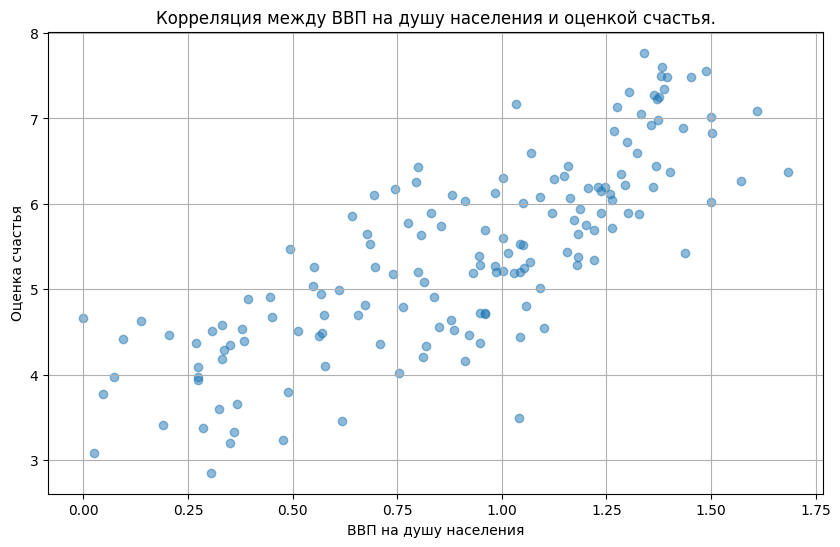

In [36]:
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(data['GDP per capita'], data['Score'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(data['GDP per capita'], data['Score'], alpha=0.5)
plt.title('Корреляция между ВВП на душу населения и оценкой счастья.')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

Коэффициент коррекляции Пирсона равен 0.7938828678781273 это означает, что между ВВП населения и оценкой счастья, есть сильная положительная связь. Из графика видно, что увеличение ВВП на душу населения приводит к повышению оценки счастья.
P-значение равно 4.315480913319774e-35, что меньше чем 0.05 подтверждая, что корреляция между ВВП на душу населения и счастья населения важна(значимая) и не является случайной.
Данные свидетельствуют о том, что ВВП на душу населения является значимым фактором, влияющим на оценку счастья. Чем выше уровень ВВП, тем выше, как правило, уровень счастья в стране.

In [39]:
# Вычисляем коэффициент корреляции Спирмена
coef, p = spearmanr(data['Social support'], data['Score'])
print(f"Коэффициент корреляции Спирмена: {coef}")
print(f"P-значение: {p}")

Коэффициент корреляции Спирмена: 0.8161807357057258
P-значение: 1.613098226311642e-38


**Задание 2:**

**— Исследование влияния социальной поддержки на оценку счастья.**

**— Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.**

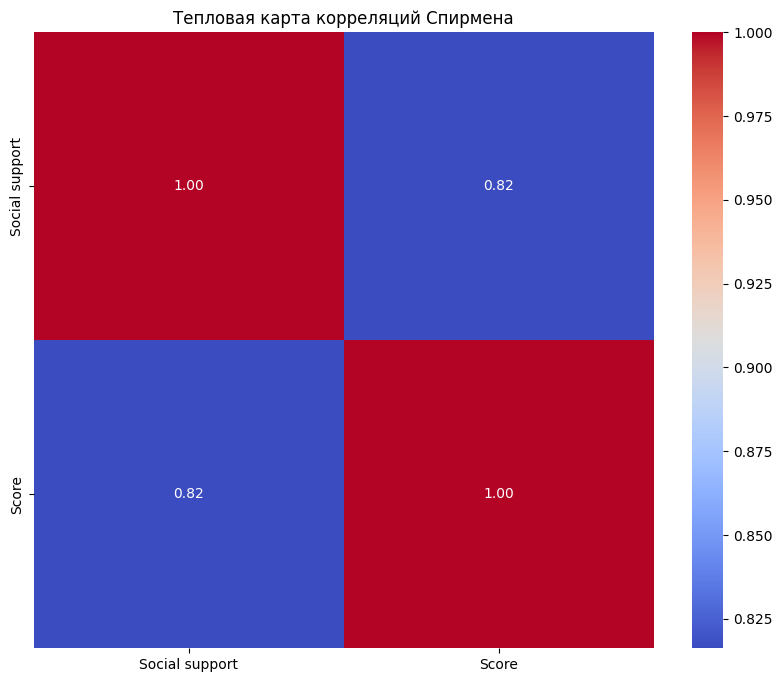

In [40]:
# Выборка количественных переменных
quantitative_vars = data[['Social support', 'Score']]
# Вычисляем матрицу корреляций Спирмена
correlation_matrix = quantitative_vars.corr(method='spearman')

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Тепловая карта корреляций Спирмена')
plt.show()

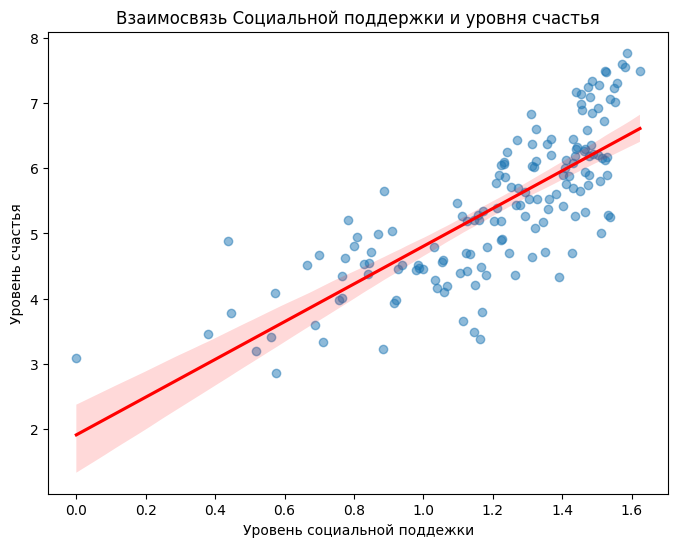

In [43]:
# График рассеивания с линией тренда для 'Social support' и 'Score'
plt.figure(figsize=(8, 6))
sns.regplot(x='Social support', y='Score', data=data, scatter_kws={'alpha': 0.5}, \
            line_kws={'color': 'red'})
plt.title('Взаимосвязь Социальной поддержки и уровня счастья')
plt.xlabel('Уровень социальной поддежки')
plt.ylabel('Уровень счастья')
plt.show()

Тепловая карта подтверждает сильную положительную корреляцию между социальной поддержкой и оценкой счастья.
График рассеивания показывает линейную зависимость между социальной поддержкой и оценкой счастья.
Коэффициент коррекляции Спирмена равен 0.8161807357057258 и близко к 1, это означает, что между социальной поддержкой и оценкой счастья, есть сильная положительная связь.
P-значение равно 1.13098226311642e-38, что меньше чем 0.05 подтверждая, что корреляция между социальной поддержкой населения и счастья населения важна(значимая) и не является случайной.



**Задание 3:**

**— Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.**

**— Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.**

Коэффициент корреляции Кэнделла: 0.6026128531700047
P-значение: 8.000780684230196e-29


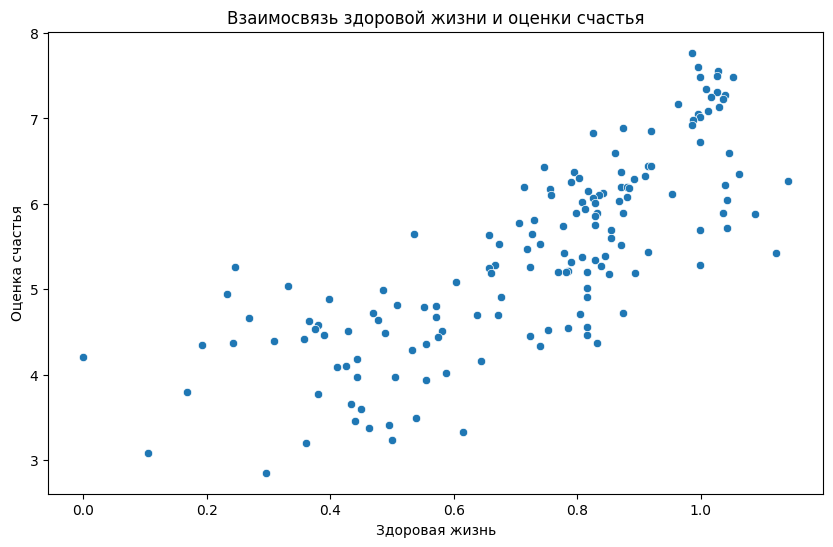

In [44]:
# Расчет коэффициента Кэнделла
tau, p_value = kendalltau(data["Healthy life expectancy"], data["Score"])
print(f"Коэффициент корреляции Кэнделла: {tau}")
print(f"P-значение: {p_value}")

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Healthy life expectancy", y="Score", data=data)
plt.title('Взаимосвязь здоровой жизни и оценки счастья')
plt.xlabel('Здоровая жизнь')
plt.ylabel('Оценка счастья')
plt.show()

Коэффициент коррекляции Кэнделла равен 0.6026128531700047 и указывает на умеренную положительную корреляцию между ожидаемой продолжительностью здоровой жизни и уровнем счастья.
P-значение равно 8.000780684230196e-29, что меньше чем 0.05 подтверждая, что в странах с высокой здоровой жизнью уровень счастья населения выше и не является случайным.

**Задание 4:**

**— Свобода делать жизненный выбор и уровень счастья.**

**— Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.**

Коэффициент корреляции Пирсона: 0.5667418257199902
P-значение: 1.23792436279821e-14


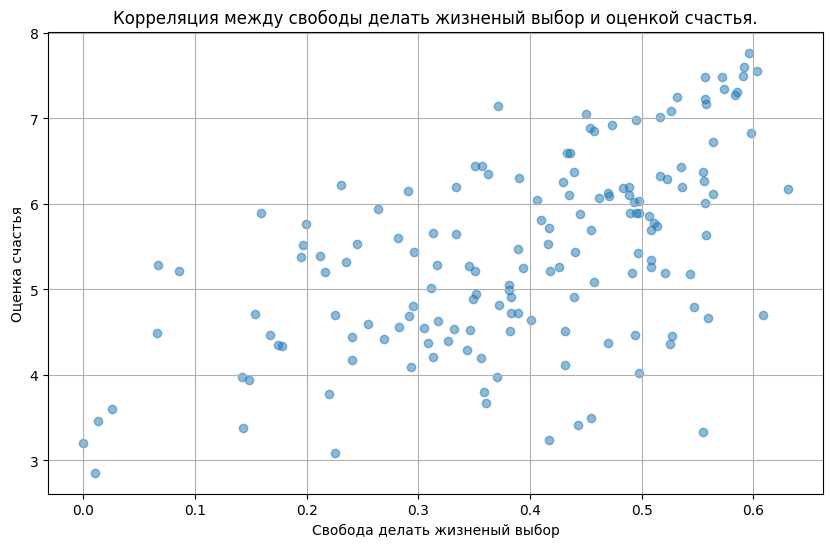

In [47]:
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(data['Freedom to make life choices'], data['Score'])
print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(data['Freedom to make life choices'], data['Score'], alpha=0.5)
plt.title('Корреляция между свободы делать жизненый выбор и оценкой счастья.')
plt.xlabel('Свобода делать жизненый выбор')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

Коэффициент коррекляции Кэнделла равен 0.56674182571999 и указывает на умеренную положительную корреляцию между свободой делать жизненый выбор и уровнем счастья.
P-значение равно 1.2379243627982083e-14, что меньше чем 0.05 подтверждая, что в странах с высокой свободой делать жизненый выбор уровень счастья населения выше и не является случайным.

**Вопросы для обсуждения:**

**— Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах?**

**— В чем может заключаться причина такой взаимосвязи?**

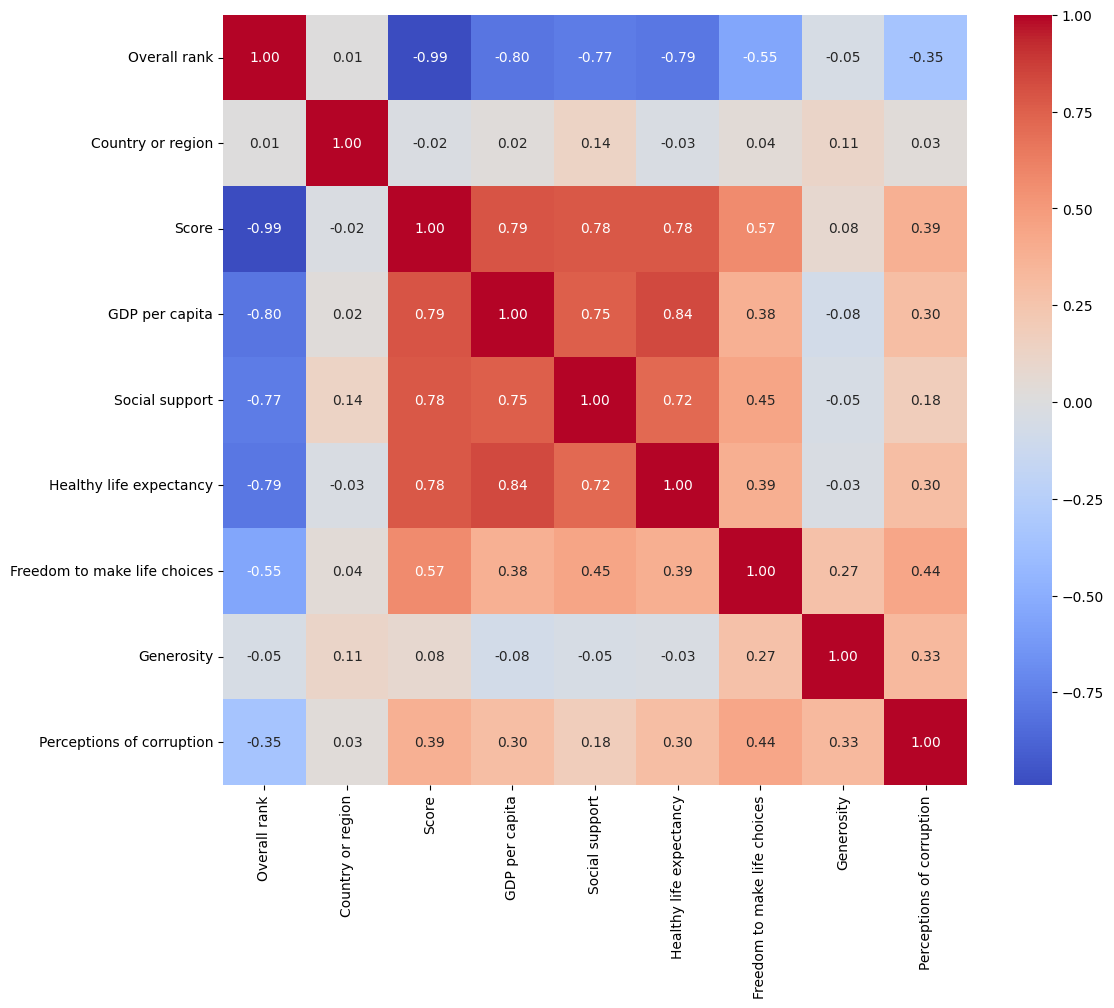

In [49]:
# Сначала переведем категориальные переменные в числовой формат, если это необходимо
data['Country or region'] = data['Country or region'].astype('category').cat.codes

# Создание матрицы корреляции
corr_matrix = data.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Причины взаимосвязи между факторами и уровнем счастья могут быть следующими:

— Экономическое благосостояние: Высокий уровень ВВП на душу населения может обеспечить доступ к качественным образовательным, медицинским и социальным услугам, что, в свою очередь, способствует улучшению качества жизни и повышению уровня счастья.

— Социальная поддержка: Люди, имеющие сильные социальные связи и поддержку, как правило, чувствуют себя более счастливыми и менее подвержены стрессу. Социальная поддержка может помочь справляться с трудностями и обеспечивать эмоциональную стабильность.

— Здоровье: Долгая и здоровая жизнь позволяет людям наслаждаться жизнью, заниматься любимыми делами и поддерживать активное участие в обществе, что способствует повышению уровня счастья.

— Свобода выбора: Возможность принимать собственные решения и управлять своей жизнью может привести к большему чувству удовлетворенности и контроля, что также положительно сказывается на уровне счастья.

— Коррупция: Низкий уровень коррупции создает более справедливое и безопасное общество, что способствует повышению доверия к правительству и институтам, а также улучшает общее качество жизни.

Исходя из данных, ВВП на душу населения демонстрирует самую сильную связь с уровнем счастья. Ожидаемая продолжительность здоровой жизни и свобода делать жизненный выбор также оказывают положительное влияние на уровень счастья, но их влияние слабее, чем влияние ВВП.

Причина такой взаимосвязи может заключаться в том, что более высокий уровень ВВП позволяет обеспечить более высокий уровень благосостояния граждан, доступ к качественной медицинской помощи, образованию, культурным и досуговым мероприятиям, что в свою очередь способствует увеличению уровня счастья населения.